In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris, load_wine
from typing import Union, Tuple
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

plt.rcParams['axes.grid'] = True

In this work we will try to build a perceptron from scratch, the Adaline perceptron. \
It works as it follows: \
![adaline](http://rasbt.github.io/mlxtend/user_guide/classifier/Adaline_files/adaline_schematic.png)

Let's start by defining the basic structure. \
The optimizer for gradient descent will be mini batch gradient descent and loss function will be mse

In [2]:
class Adaline:
    """
    lr: learning rate of the perceptron
    epochs: number of epochs to train the perceptron
    batch_size: number of rows considered for each weigts update
    """
    def __init__(self, lr: float = 0.005, epochs: int = 30, batch_size: int = 20):
        self.lr = lr
        self.epochs = epochs
        self.bs = batch_size

    def fit(self, X: Union[np.ndarray, pd.DataFrame] , y: Union[np.ndarray, pd.Series, pd.DataFrame]) -> None:
        self.losses = []
        self.weights = self.weights_initializer(X.shape[1] + 1)

        for epoch in range(self.epochs):

            cost = []
            X, y = self.shuffle_data(X, y)
            res = X.shape[0]%self.bs
            for i in range(int(X.shape[0]/self.bs)):
                cost.append(self.backprop(X[self.bs*i:self.bs*(i+1)], y[self.bs*i:self.bs*(i+1)]))
            
            #Add last batch if not included
            cost.append(self.backprop(X[-res:], y[-res:]))

            cost = np.array(cost)
            self.losses.append(cost.mean())

    def weights_initializer(self, dim: int) -> np.ndarray:
        weights = np.random.normal(loc=0.01, size=dim)
        return weights

    def shuffle_data(self, X: Union[np.ndarray, pd.DataFrame], y: Union[np.ndarray, pd.Series, pd.DataFrame]) -> Tuple[np.ndarray, np.ndarray]:
        r = np.random.permutation(len(y))
        return X[r], y[r]

    def forward(self, X: np.ndarray) -> np.ndarray:
        output = X.dot(self.weights[1:]) + self.weights[0]
        return output

    def backprop(self, xi: np.ndarray, yi: np.ndarray) -> float:
        output = self.forward(xi)
        error = np.array(yi - output)
        self.weights[1:] += self.lr * error.dot(xi)
        self.weights[0] += self.lr * error.sum()
        cost = 0.5 * (error**2).sum()

        return cost
    
    def predict(self, X: Union[np.ndarray, pd.DataFrame]) -> Union[np.ndarray, pd.DataFrame]:
        
        result = self.forward(X)
        result = np.where( (result > 0.5), 1, 0)
        return result

    def plot_loss(self):

        sns.lineplot(x=list(range(1, self.epochs +1)), y=self.losses, marker='o')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')


In [3]:
data = load_wine()
X, y = data.data, data.target

#Select only 2 targets 
idx = np.where(y<2)
X, y = X[idx], y[idx]

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

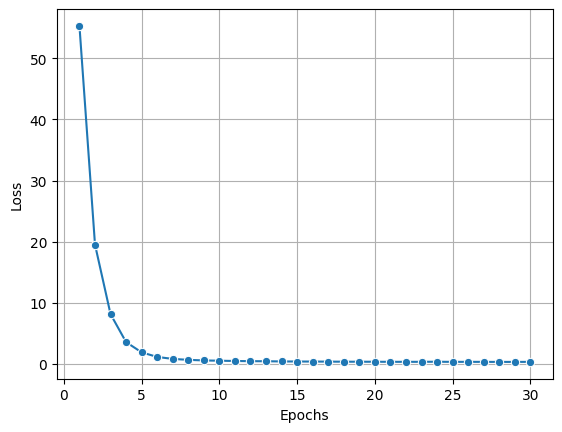

In [4]:
model = Adaline()
model.fit(X_train, y_train)
model.plot_loss()

Let's evaluate the accuracy

In [5]:
test_accuracy = accuracy_score(y_test, model.predict(X_test))
train_accuracy = accuracy_score(y_train, model.predict(X_train))
print(f'{train_accuracy = }')
print(f'{test_accuracy = }')

train_accuracy = 1.0
test_accuracy = 1.0


Let's try to compare the results with a Sklearn model without tuning Hyperparameters

In [6]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)

test_accuracy = accuracy_score(y_test, lr.predict(X_test))
train_accuracy = accuracy_score(y_train, lr.predict(X_train))
print(f'{train_accuracy = }')
print(f'{test_accuracy = }')

train_accuracy = 1.0
test_accuracy = 1.0


As expected, both have very good results, due to the separability of the dataset and the similarity in the structure